<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202520/blob/main/Lecture01/L01_01_LR.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Lógica basica de la predicción con regresión lineal

Nuestro objetivo  es construir un modelo predictivo de salario

$$
w = f(X) + u
$$

donde w es el salario y X es una matriz que incluye posibles variables/predictores explicativas (ej. educación, edad, educación de los padres, habilidad cognitiva, etc.).

Un ejemplo de modelo predictivo es la regresión lineal con una forma funcional específica:

$$
ln(w)  = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p + u
$$

donde $ln(w)$ es el logaritmo del salario.

Para ilustrar, usaré una muestra del NLSY97. El NLSY97 es una muestra representativa a nivel nacional de 8.984 hombres y mujeres nacidos entre 1980 y 1984 y que vivían en los Estados Unidos durante la encuesta inicial de 1997. Los participantes tenían entre 12 y 16 años al 31 de diciembre de 1996. Las entrevistas se realizaron anualmente desde 1997 hasta 2011 y cada dos años desde entonces.

Carguemos los paquetes.

In [1]:
# install.packages("pacman") #Correr esta linea en Google Colab

In [5]:
# Install the packages
install.packages(c("pacman", "tidyverse", "stargazer"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# Cargamos los paquetes

require("pacman")

p_load("tidyverse","stargazer")


Loading required package: pacman



Cargamos la base:

In [7]:
nlsy <- read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')

#Housekeeping
nlsy <- nlsy  %>%   drop_na(educ) #dropea los valores faltantes (NA)

Rows: 1266 Columns: 994
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (994): lnw_2016, educ, black, hispanic, other, exp, afqt, mom_educ, dad_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
head(nlsy)

lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,⋯,_XPexp_13,_XPexp_14,_XPexp_16,_XPexp_17,_XPexp_18,_XPexp_19,_XPexp_20,_XPexp_21,_XPexp_22,_XPexp_23
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.076898,16,0,0,0,11,7.0724,12,12,3,⋯,0,0,0,0,0,0,0,0,0,0
3.294138,9,0,0,0,19,4.7481,9,10,2,⋯,0,0,0,0,0,1,0,0,0,0
2.830896,9,0,1,0,22,1.1987,12,9,3,⋯,0,0,0,0,0,0,0,0,1,0
4.306459,16,0,0,0,13,8.9321,16,18,2,⋯,1,0,0,0,0,0,0,0,0,0
5.991465,16,0,1,0,15,2.2618,16,16,1,⋯,0,0,0,0,0,0,0,0,0,0
4.711924,16,0,0,0,14,8.9502,18,20,1,⋯,0,1,0,0,0,0,0,0,0,0


## Regresión Lineal

In [9]:
reg1 <- lm(lnw_2016~educ,   data = nlsy)

In [10]:
reg2 <- lm(lnw_2016~educ+ exp,   data = nlsy)

In [11]:
stargazer(reg1,reg2,type="text") #Similar en stata: outreg2


                                   Dependent variable:               
                    -------------------------------------------------
                                        lnw_2016                     
                              (1)                      (2)           
---------------------------------------------------------------------
educ                        0.077***                 0.110***        
                            (0.008)                  (0.019)         
                                                                     
exp                                                   0.032*         
                                                     (0.017)         
                                                                     
Constant                    2.003***                 1.063**         
                            (0.119)                  (0.507)         
                                                                     
-------------------

## Predicción

$$
\hat{y} = \hat{\beta}_0 +  \hat{\beta}_1 educ
$$

In [12]:
reg1$coef # simbolo $ extrae los coef

(Intercept)        educ 
 2.00307383  0.07732004

In [13]:
reg1$coef[1]

(Intercept) 
   2.003074

In [15]:
reg1$coef[1]+reg1$coef[2]*16 # intercepto + coef * años de edu ejem 16

(Intercept) 
   3.240194

In [16]:
exp(reg1$coef[1]+reg1$coef[2]*16)

(Intercept) 
   25.53869

## Mejor predictor

Vamos a constuir regresores polinomiales de forma tal de tnere reglas de predicción más flexibles y potencialmente mejores.

In [17]:
#Polinomios de educación

nlsy <- nlsy  %>% mutate(educ2=educ^2,
                         educ3=educ^3,
                         educ4=educ^4,
                         educ5=educ^5,
                         educ6=educ^6,
                         educ7=educ^7,
                         educ8=educ^8
                        )

In [18]:
head(nlsy)

lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,⋯,_XPexp_21,_XPexp_22,_XPexp_23,educ2,educ3,educ4,educ5,educ6,educ7,educ8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.076898,16,0,0,0,11,7.0724,12,12,3,⋯,0,0,0,256,4096,65536,1048576,16777216,268435456,4294967296
3.294138,9,0,0,0,19,4.7481,9,10,2,⋯,0,0,0,81,729,6561,59049,531441,4782969,43046721
2.830896,9,0,1,0,22,1.1987,12,9,3,⋯,0,1,0,81,729,6561,59049,531441,4782969,43046721
4.306459,16,0,0,0,13,8.9321,16,18,2,⋯,0,0,0,256,4096,65536,1048576,16777216,268435456,4294967296
5.991465,16,0,1,0,15,2.2618,16,16,1,⋯,0,0,0,256,4096,65536,1048576,16777216,268435456,4294967296
4.711924,16,0,0,0,14,8.9502,18,20,1,⋯,0,0,0,256,4096,65536,1048576,16777216,268435456,4294967296


 Corremos la regresión

In [19]:
reg3<- lm(lnw_2016~educ+ educ2 + educ3 + educ4 + educ5 + educ6 + educ7 +
    educ8 ,   data = nlsy)


In [20]:
stargazer(reg1,reg2,reg3,type="text") #Similar en stata: outreg2


                                               Dependent variable:                            
                    --------------------------------------------------------------------------
                                                     lnw_2016                                 
                              (1)                      (2)                      (3)           
----------------------------------------------------------------------------------------------
educ                        0.077***                 0.110***                3,798.831*       
                            (0.008)                  (0.019)                (2,157.819)       
                                                                                              
exp                                                   0.032*                                  
                                                     (0.017)                                  
                                                 

In [21]:
#predict me simplifica hacer la operación X\hat{\beta}

nlsy <- nlsy  %>% mutate(yhat=predict(reg3)) #con la función mutate (para no hacer trabajo manual coef*valor uno por uno, usar predict)

In [22]:
head(nlsy)

lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,⋯,_XPexp_22,_XPexp_23,educ2,educ3,educ4,educ5,educ6,educ7,educ8,yhat
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.076898,16,0,0,0,11,7.0724,12,12,3,⋯,0,0,256,4096,65536,1048576,16777216,268435456,4294967296,3.311502
3.294138,9,0,0,0,19,4.7481,9,10,2,⋯,0,0,81,729,6561,59049,531441,4782969,43046721,2.661006
2.830896,9,0,1,0,22,1.1987,12,9,3,⋯,1,0,81,729,6561,59049,531441,4782969,43046721,2.661006
4.306459,16,0,0,0,13,8.9321,16,18,2,⋯,0,0,256,4096,65536,1048576,16777216,268435456,4294967296,3.311502
5.991465,16,0,1,0,15,2.2618,16,16,1,⋯,0,0,256,4096,65536,1048576,16777216,268435456,4294967296,3.311502
4.711924,16,0,0,0,14,8.9502,18,20,1,⋯,0,0,256,4096,65536,1048576,16777216,268435456,4294967296,3.311502


In [26]:
# Voy a calcular E(y|X=x) y E(\hat(y)| X=x)

summ = nlsy %>%
  group_by(
    educ, educ2, educ3, educ4, educ5,
    educ6, educ7, educ8
  ) %>%
  summarize(
    mean_y = mean(lnw_2016),
    yhat_reg = mean(yhat), .groups="drop"
  )

In [27]:
head(summ)

educ,educ2,educ3,educ4,educ5,educ6,educ7,educ8,mean_y,yhat_reg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,64,512,4096,32768,262144,2097152,16777216,2.893439,2.893126
9,81,729,6561,59049,531441,4782969,43046721,2.660140,2.661006
10,100,1000,10000,100000,1000000,10000000,100000000,2.592467,2.597356
11,121,1331,14641,161051,1771561,19487171,214358881,2.862028,2.824300
12,144,1728,20736,248832,2985984,35831808,429981696,2.948959,2.972449
13,169,2197,28561,371293,4826809,62748517,815730721,3.080338,2.969692


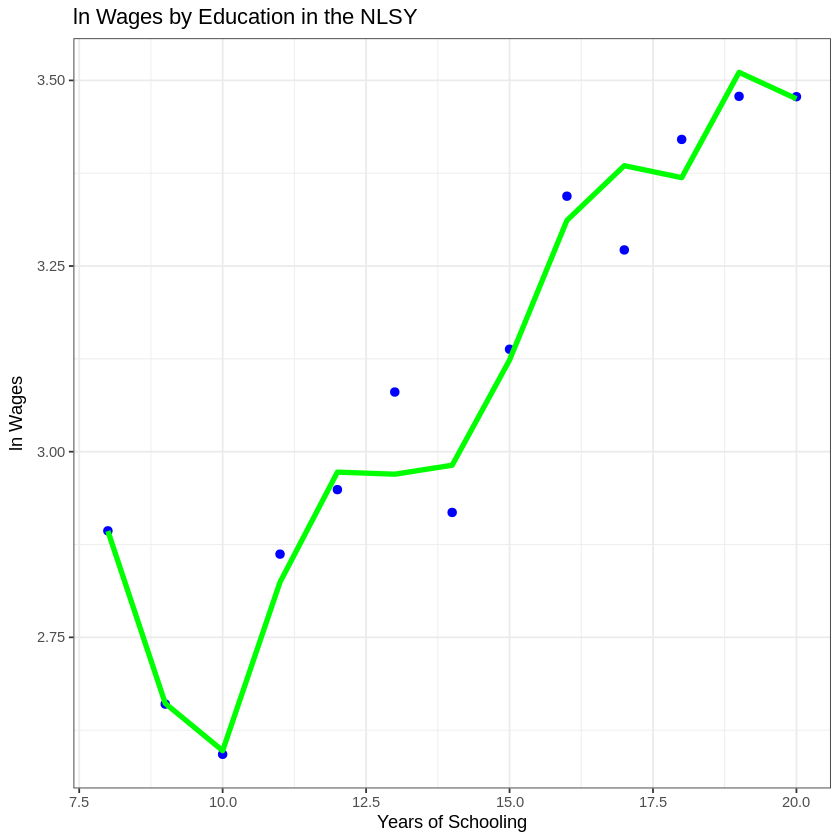

In [25]:
# graficamos
ggplot(summ) +
  geom_point(
    aes(x = educ, y = mean_y),
    color = "blue", size = 2
  ) +
  geom_line(
    aes(x = educ, y = yhat_reg),
    color = "green", linewidth = 1.5
  ) +
  labs(
    title = "ln Wages by Education in the NLSY",
    x = "Years of Schooling",
    y = "ln Wages"
  ) +
  theme_bw()


Como podemos ver, este modelo flexible captura muy bien patrones complejos.

Incluyendo un conjunto lo suficientemente rico de transformaciones, las predicciones de OLS producirán estimaciones del predictor ideal: la función de expectativa condicional.